<a href="https://colab.research.google.com/github/aulia-anhar/Kasus3_Data_Mining/blob/main/KNN_Corp_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inport**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
file_path = '/content/drive/MyDrive/Semester 5/Data mining/Kasus3/Crop_recommendation.csv'
dataset = pd.read_csv(file_path)

#Explorasi Data

In [ ]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


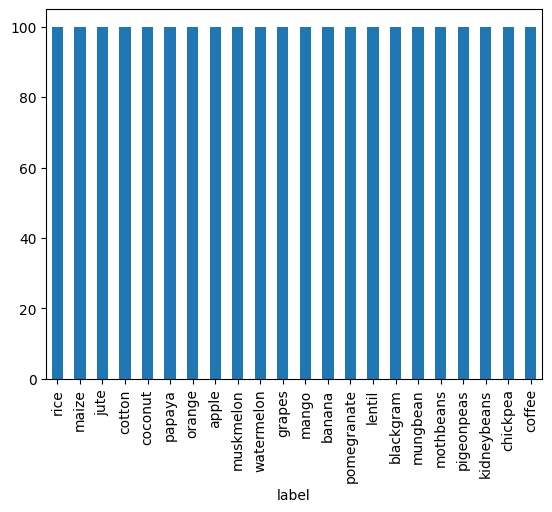

In [ ]:
labels = dataset["label"].unique()
dataset["label"].value_counts().plot(kind="bar")
plt.show()

distribusi data sudah seimbang, maka tidak perlu menyeimbangkan data.

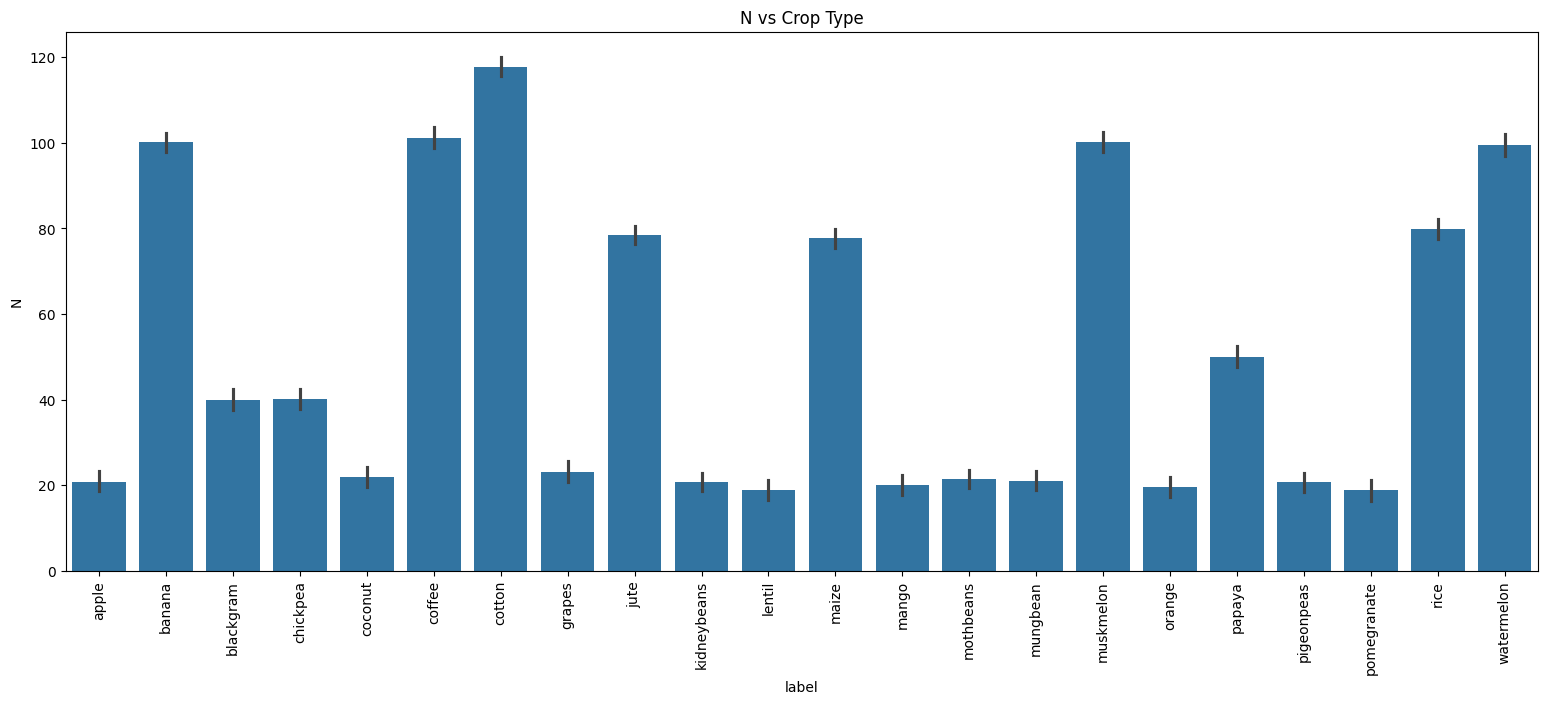

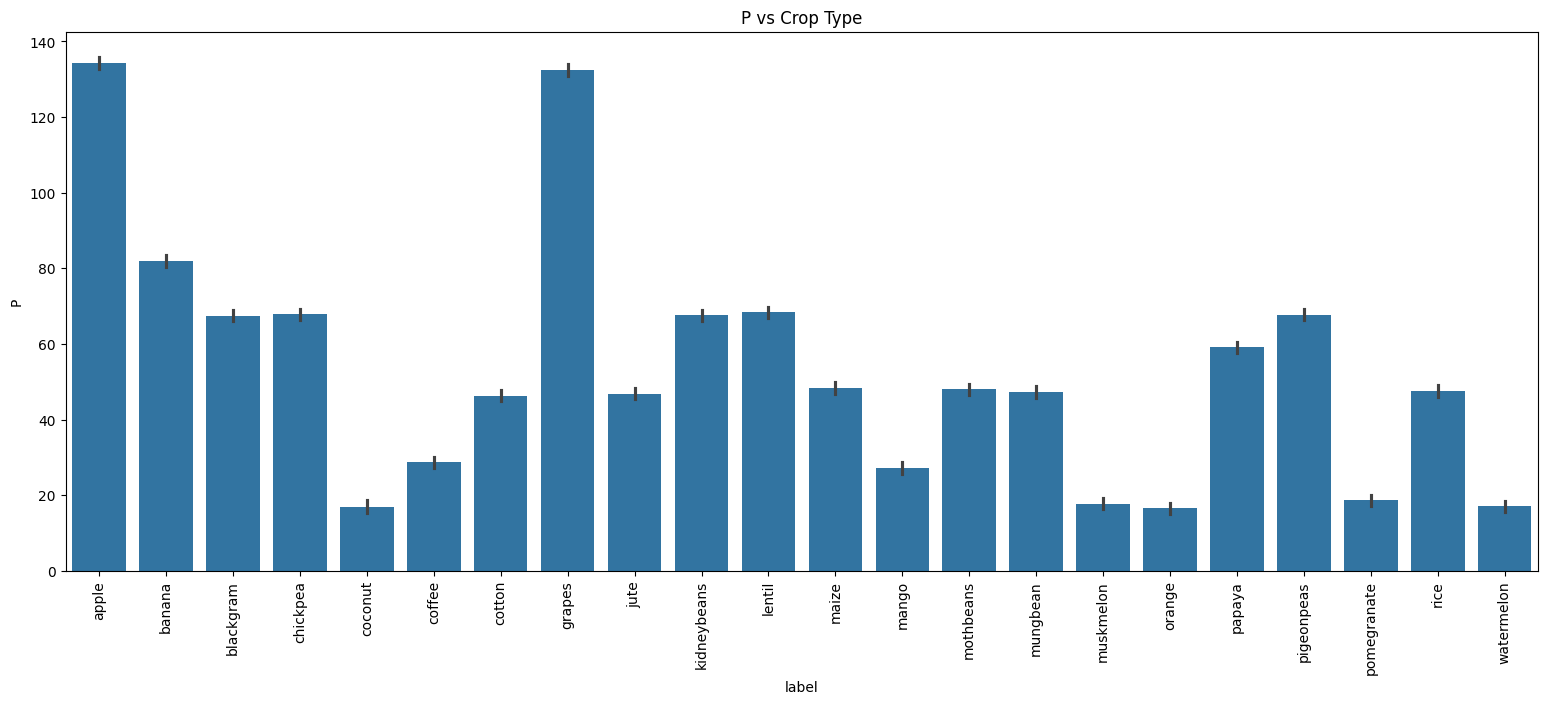

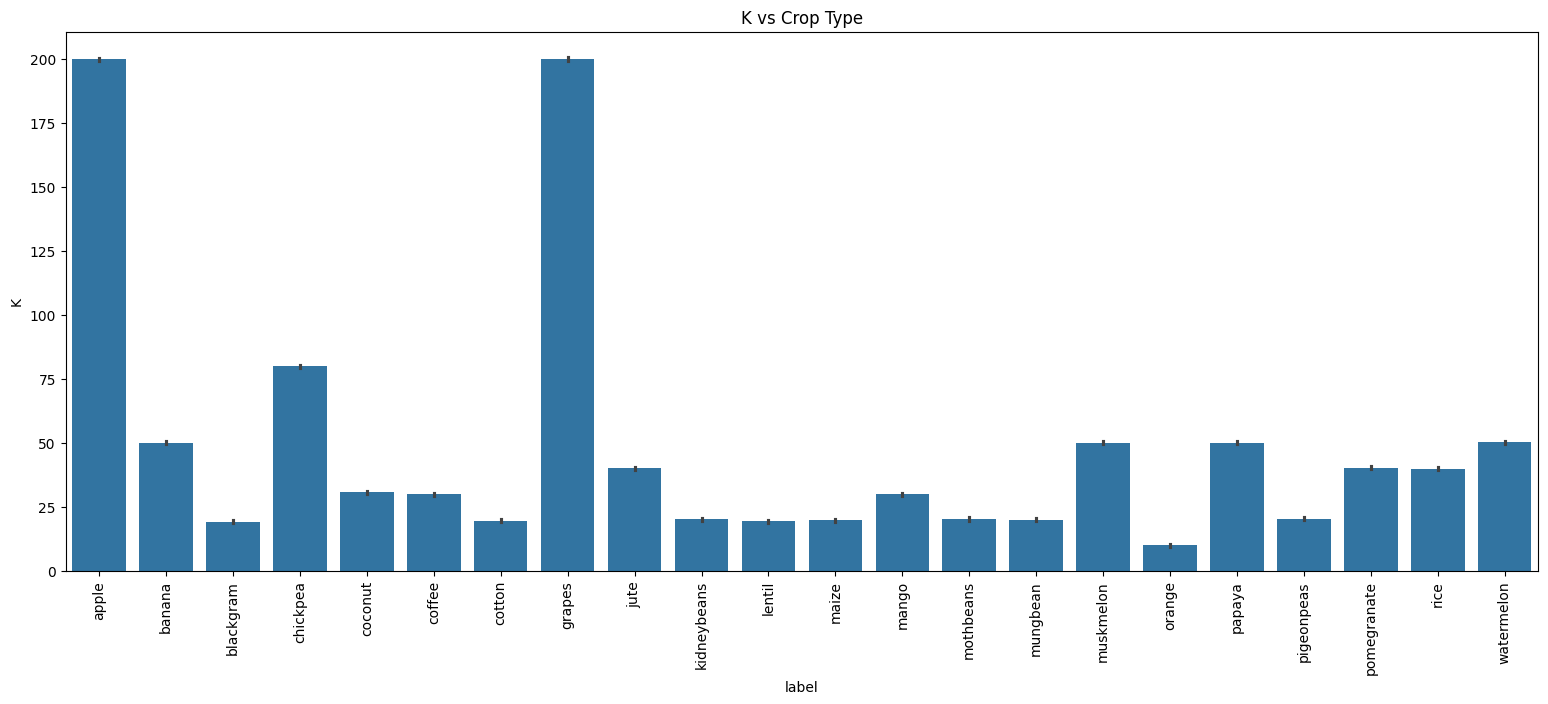

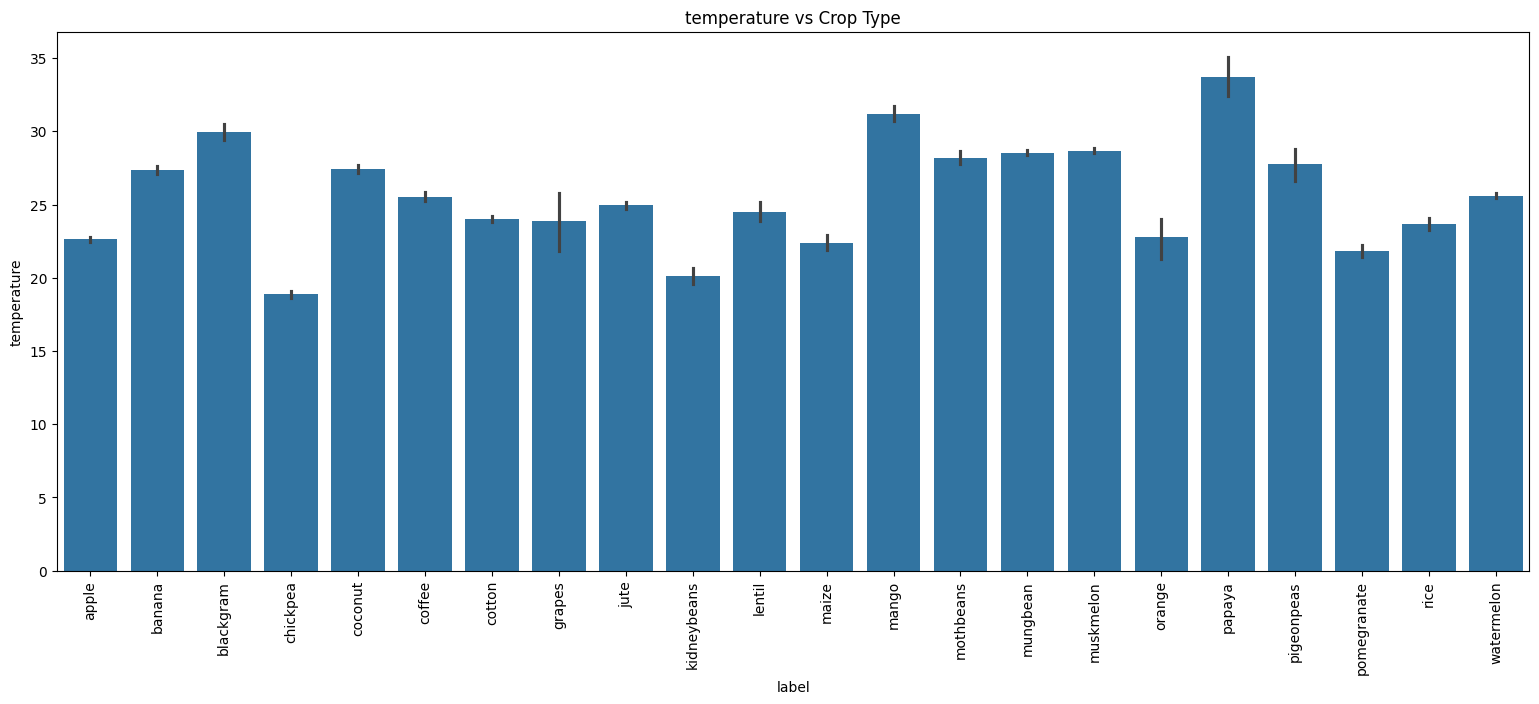

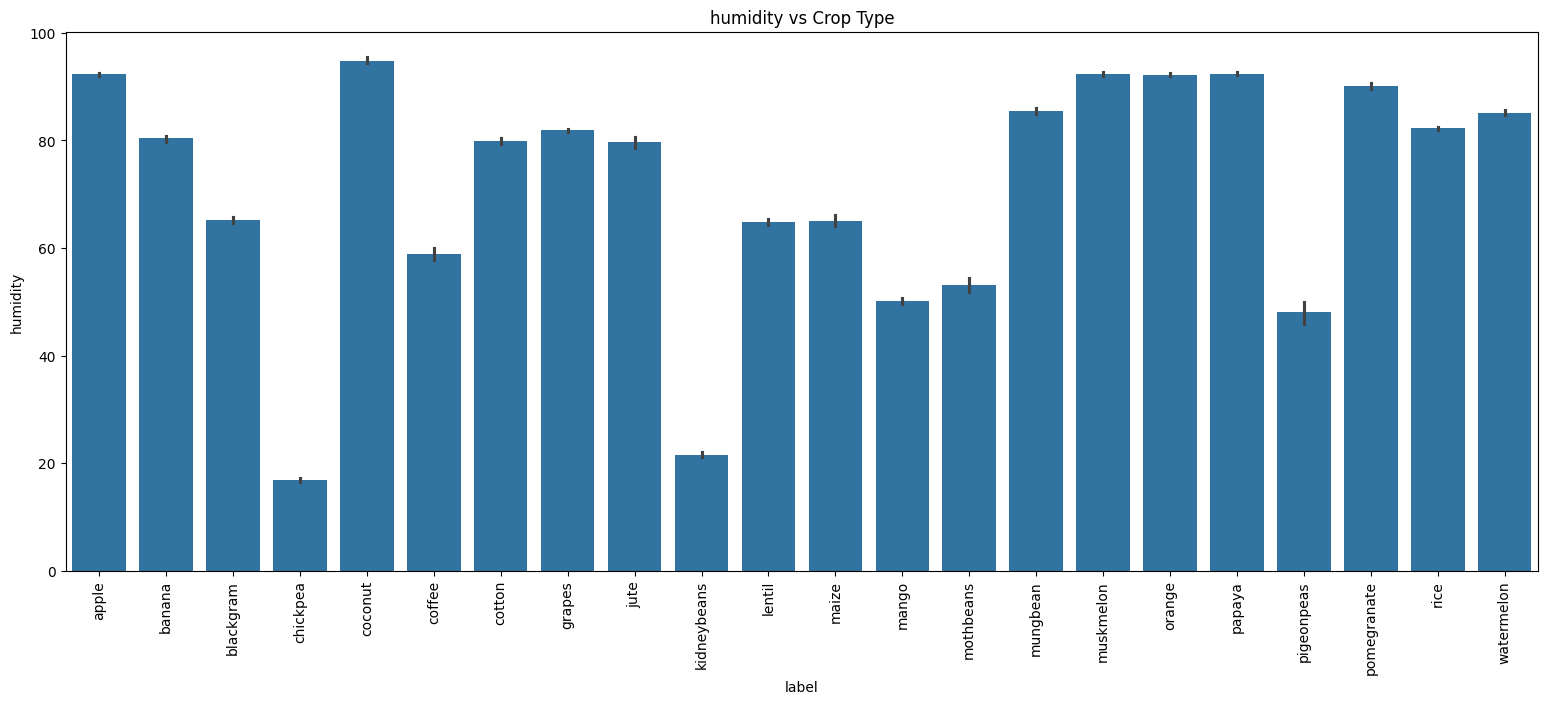

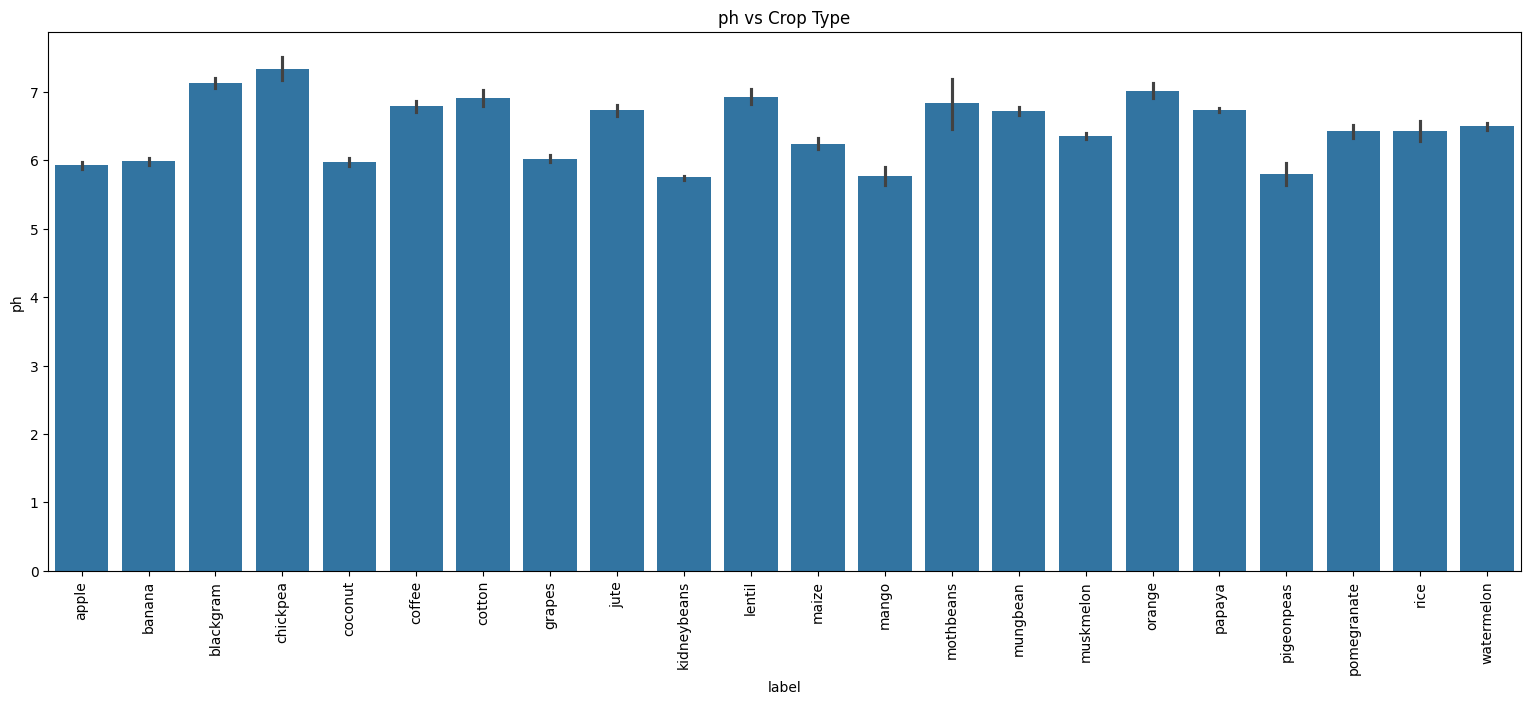

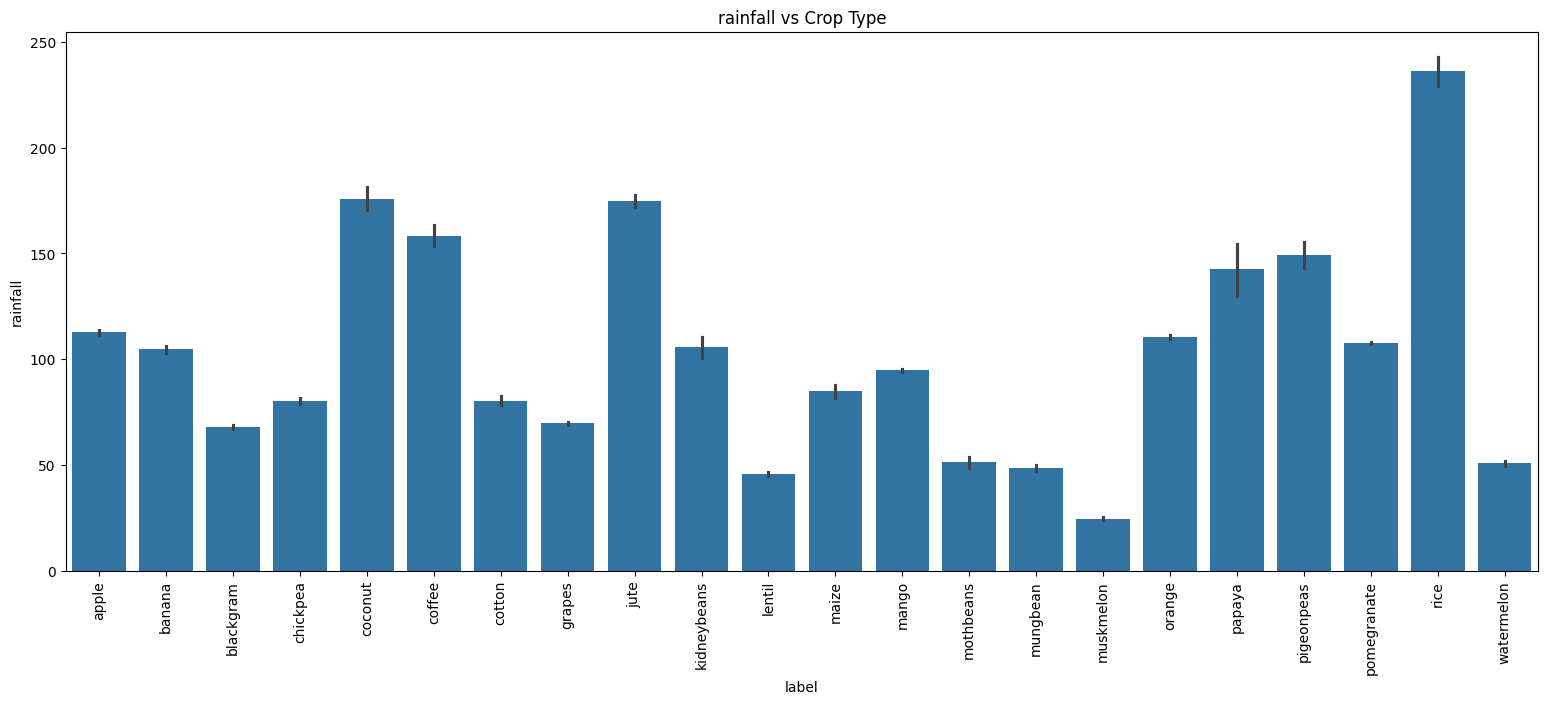

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil semua kolom dari data yang dimuat
all_columns = dataset.columns

# Tentukan urutan label jika Anda punya preferensi khusus, misalnya berdasarkan abjad:
order_labels = sorted(dataset['label'].unique())  # Pastikan kolom 'label' ada di dataset Anda

for column in all_columns:
    if column != 'label':  # Abaikan kolom 'label' sebagai nilai y
        plt.figure(figsize=(19,7))
        sns.barplot(x='label', y=column, data=dataset, order=order_labels)
        plt.xticks(rotation=90)
        plt.title(f"{column} vs Crop Type")
        plt.show()


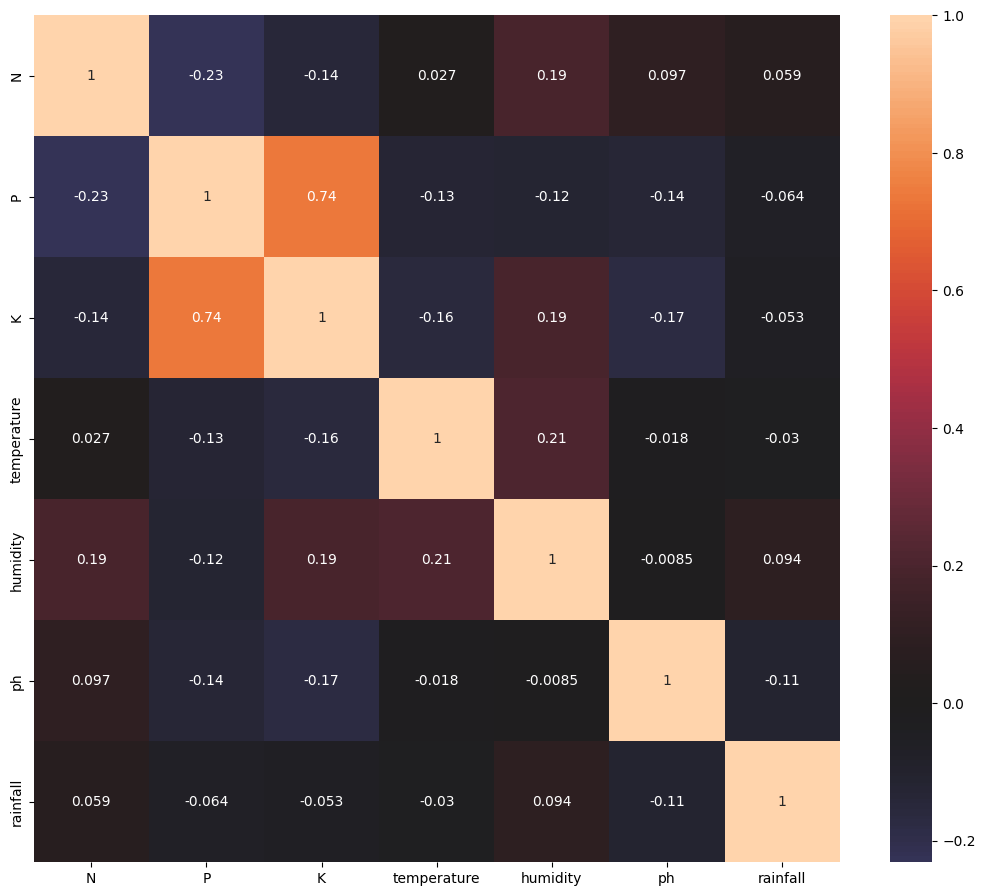

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize = (13,11))
sns.heatmap(numerical_dataset.corr(), center = 0, annot = True)
plt.show()

Dari paiplot kita dapat melihat bahwa klaster yang berbeda terbentuk berdasarkan fitur dalam kumpulan data.

In [44]:
label_encoder = LabelEncoder()
X = dataset[all_columns]
y = label_encoder.fit_transform(dataset["label"])
print(X.shape, y.shape)

(2200, 8) (2200,)
(2200, 8) (2200,)


In [45]:
label_dict = {}
for i in range(22):
    label_dict[i] = label_encoder.inverse_transform([i])[0]
label_dict

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

# Split data

In [61]:
# Assuming X contains your original DataFrame with the 'apple' value
# Identify the categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a LabelEncoder for each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Transform the column in place
    label_encoders[col] = le  # Store the encoder for later use if needed

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (1760, 8), (1760,)
Train Data: (440, 8), (440,)


# KKN Classifer

Accuracy at k = 1 is 1.0
Accuracy at k = 2 is 0.9977272727272727
Accuracy at k = 3 is 1.0
Accuracy at k = 4 is 0.9977272727272727
Accuracy at k = 5 is 1.0
Accuracy at k = 6 is 0.9977272727272727
Accuracy at k = 7 is 0.9977272727272727
Accuracy at k = 8 is 0.9977272727272727
Accuracy at k = 9 is 0.9977272727272727
Accuracy at k = 10 is 0.9977272727272727
Accuracy at k = 11 is 0.9977272727272727
Accuracy at k = 12 is 0.9977272727272727
Accuracy at k = 13 is 0.9977272727272727
Accuracy at k = 14 is 0.9977272727272727
Accuracy at k = 15 is 0.9954545454545455
Accuracy at k = 16 is 0.9977272727272727
Accuracy at k = 17 is 0.9954545454545455
Accuracy at k = 18 is 0.9954545454545455
Accuracy at k = 19 is 0.9977272727272727
Accuracy at k = 20 is 0.9954545454545455
Accuracy at k = 21 is 0.9931818181818182
Accuracy at k = 22 is 0.9931818181818182
Accuracy at k = 23 is 0.9886363636363636
Accuracy at k = 24 is 0.9886363636363636
Accuracy at k = 25 is 0.9840909090909091
Accuracy at k = 26 is 0.98636

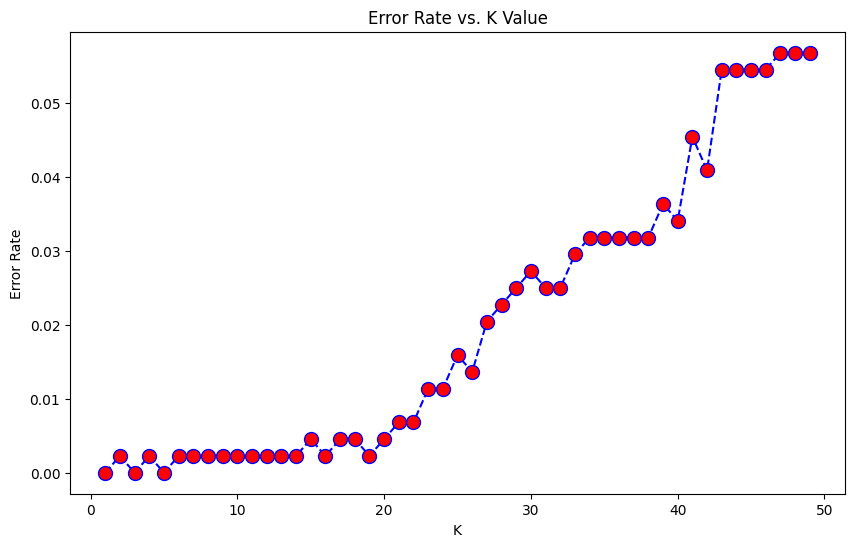

In [64]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Train Data: (1760, 8), (1760,)
Train Data: (440, 8), (440,)
Accuracy at k = 1 is 1.0
Accuracy at k = 2 is 0.9977272727272727
Accuracy at k = 3 is 1.0
Accuracy at k = 4 is 0.9977272727272727
Accuracy at k = 5 is 1.0
Accuracy at k = 6 is 0.9977272727272727
Accuracy at k = 7 is 0.9977272727272727
Accuracy at k = 8 is 0.9977272727272727
Accuracy at k = 9 is 0.9977272727272727
Accuracy at k = 10 is 0.9977272727272727
Accuracy at k = 11 is 0.9977272727272727
Accuracy at k = 12 is 0.9977272727272727
Accuracy at k = 13 is 0.9977272727272727
Accuracy at k = 14 is 0.9977272727272727
Accuracy at k = 15 is 0.9954545454545455
Accuracy at k = 16 is 0.9977272727272727
Accuracy at k = 17 is 0.9954545454545455
Accuracy at k = 18 is 0.9954545454545455
Accuracy at k = 19 is 0.9977272727272727
Accuracy at k = 20 is 0.9954545454545455
Accuracy at k = 21 is 0.9931818181818182
Accuracy at k = 22 is 0.9931818181818182
Accuracy at k = 23 is 0.9886363636363636
Accuracy at k = 24 is 0.9886363636363636
Accuracy a

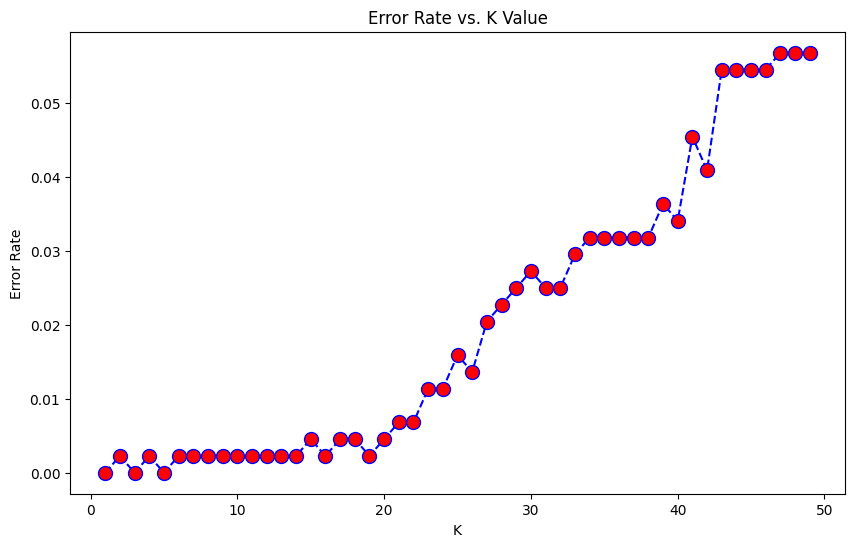

In [60]:
!pip install scikit-learn pandas numpy
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Assuming X contains your original DataFrame with the 'apple' value
# Identify the categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a LabelEncoder for each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Transform the column in place
    label_encoders[col] = le  # Store the encoder for later use if needed

# Proceed with your existing code
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")


error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-", min(error_rate), "at K =", error_rate.index(min(error_rate)) + 1)

Accuracy on Test Data: 99.77272727272727%


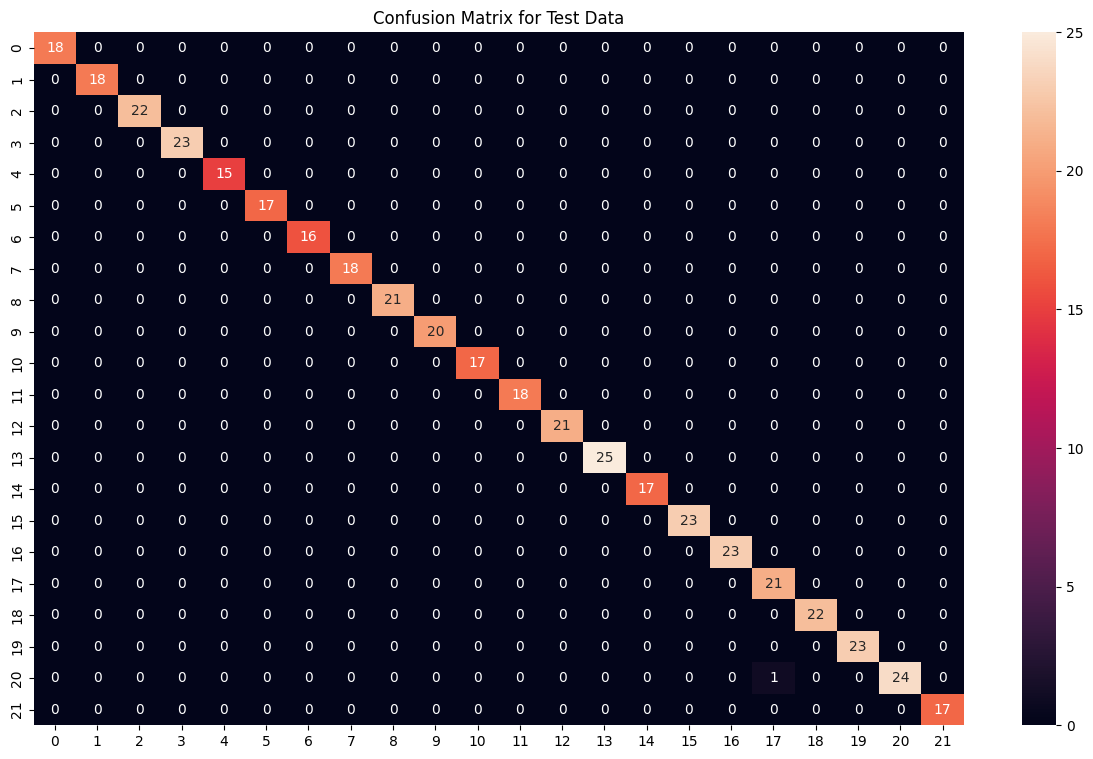

In [68]:

# Optimal K value is 4
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=4))
knn_pipeline.fit(X_train, y_train)

# Test Data Metrics
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy * 100}%")
plt.figure(figsize=(15, 9))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)  # Now confusion_matrix is defined
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Whole Data: 99.77272727272727%


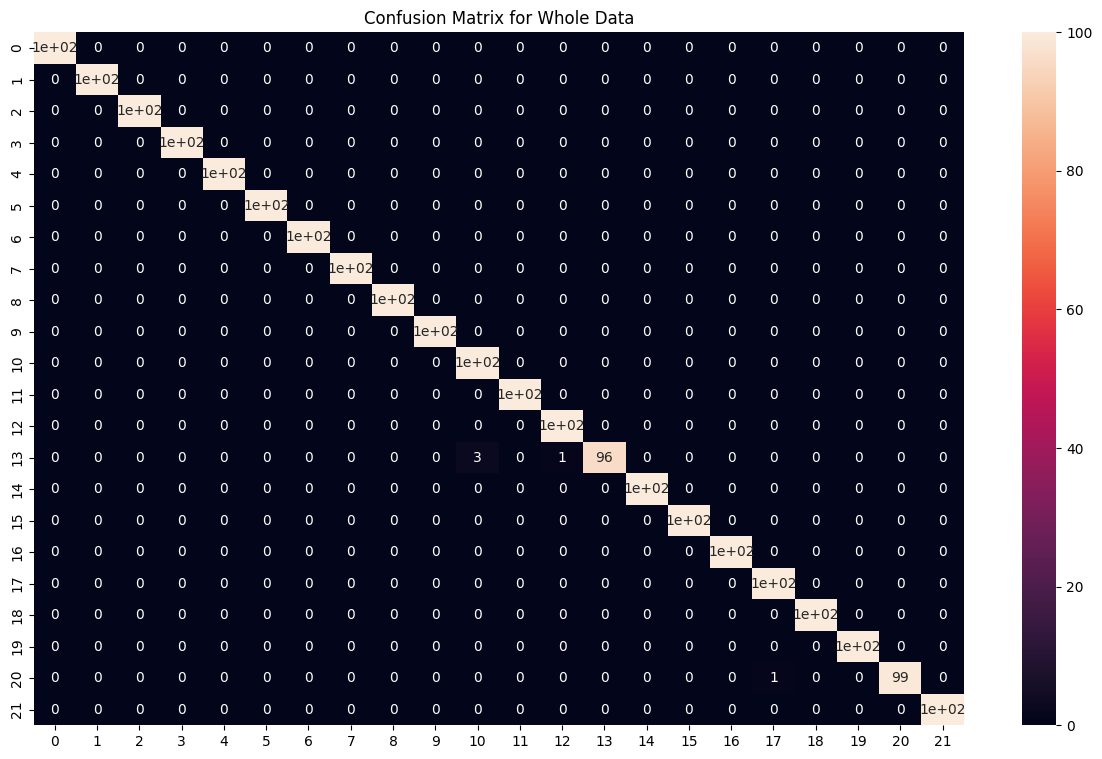

In [67]:
# Whole Data Metrics
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()